<a href="https://colab.research.google.com/github/hadilaouadi/-Exploratory-Data-Analysis-/blob/main/EDA_Airbnb_NYC_listings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019 1(in).csv to AB_NYC_2019 1(in).csv


In [3]:
df = pd.read_csv('AB_NYC_2019 1(in).csv')
df.head(10)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,Entire home/apt,200,3,74,6/22/2019,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,10/5/2017,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,Private room,79,2,430,6/24/2019,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,Private room,79,2,118,7/21/2017,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,Entire home/apt,150,1,160,6/9/2019,1.33,4,188


# Data definition

**id**: Unique identifier for the listing (property).

**name**: Title or name of the Airbnb listing.

**host_id**: Unique identifier for the host (property owner).

**host_name**: Name of the host (property owner).

**neighbourhood_group**: Larger administrative district or borough (e.g., Manhattan, Brooklyn).

**neighbourhood**: Specific neighborhood within the neighbourhood_group.

**room_type**: Type of accommodation.

**price**: Nightly rental price in USD.

**minimum_nights**: Minimum number of nights required for booking.

**number_of_reviews**: Total number of reviews the listing has received.

**last_review**: Date of the most recent review.

**reviews_per_month**: Average reviews per month, based on the listing's lifetime.

**calculated_host_listings_count**: Total listings the host has on Airbnb.






















# Data cleaning

In [4]:


# 1. Check Missing Values
print("Missing Values Before Cleaning:")
print(df.isnull().sum())

# 2. Handle Missing Values
# --- For 'last_review' (date column): Fill with a placeholder (e.g., 'No Review') or drop
df['last_review'] = df['last_review'].fillna('No Review')

# --- For 'reviews_per_month' (float column): Fill with 0 (assuming no reviews = 0/month)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# --- For 'name'/'host_name' (text columns): Fill with 'Unknown'
df['name'] = df['name'].fillna('Unknown')
df['host_name'] = df['host_name'].fillna('Unknown')

# 3. Drop Unnecessary Columns (if needed)
# Example: Drop columns with >50% missing values (adjust threshold)
threshold = len(df) * 0.5
df_cleaned = df.dropna(thresh=threshold, axis=1)

# 4. Verify Cleaning
print("\nMissing Values After Cleaning:")
print(df_cleaned.isnull().sum())

# 5. Save Cleaned Data (Optional)
df_cleaned.to_csv('AB_NYC_2019_CLEANED.csv', index=False)

Missing Values Before Cleaning:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Missing Values After Cleaning:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
las

In [21]:

# Load the cleaned CSV file
df_clean = pd.read_csv('AB_NYC_2019_CLEANED.csv')

# Verify it loaded correctly
df_clean.head(10) # First 5 rows


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,No Review,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,Entire home/apt,200,3,74,6/22/2019,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,10/5/2017,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,Private room,79,2,430,6/24/2019,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,Private room,79,2,118,7/21/2017,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,Entire home/apt,150,1,160,6/9/2019,1.33,4,188


# Central Tendency Analysis

In [6]:
mean_price = df['price'].mean()

# Print result with dollar formatting
print(f"Mean Price: ${mean_price:.2f}")


Mean Price: $152.72


The average nightly price for an Airbnb rental in NYC is $152.72

In [ ]:
from statistics import mode
median_price = df['price'].median()

# Calculate mode price (handling cases where multiple modes exist)
try:
    mode_price = mode(df['price'])
except StatisticsError:
    mode_price = "Multiple modes exist"

print(f"Median Price: ${median_price:.2f}")
print(f"Mode Price: {mode_price}")


Median Price: $106.00
Mode Price: 100


The median price for an Airbnb listing in NYC is
106 while the mode is 100 US dollars Since both values are significantly lower than the previously calculated mean (approximately $153).

In [7]:
mean_price_by_borough = df_clean.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
print(mean_price_by_borough)


neighbourhood_group
Manhattan        196.875814
Brooklyn         124.383207
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64


The data highlights that manhattan is a clear pricing outlier ,with airbnb listings averaging 196.87 dollars which is 44% higher than bronx .This extreme disparity underscores Manhattan’s unique position as a premium short-term rental market, driven by its dense concentration of tourist attractions, business hubs, and luxury properties

In [8]:
neighbourhood_group_counts = df['neighbourhood_group'].value_counts()
print("\nCount of each neighbourhood group:")
print(neighbourhood_group_counts)


Count of each neighbourhood group:
neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64


Manhattan and Brooklyn host the highest concentration of Airbnb listings in New York City, while also commanding the highest average nightly prices. This trend suggests that NYC visitors are primarily drawn to these boroughs, likely due to their combination of desirable locations, upscale accommodations, and wider price range offerings. The premium pricing in these areas indicates strong demand for both luxury properties and convenient.

# Variability Analysis

In [9]:
price_std = df_clean['price'].std()

print(f"Standard Deviation of Prices: ${price_std:.2f}")



Standard Deviation of Prices: $240.15


With a standard deviation of $240.15, the data reveals significant variation in nightly rental prices across New York City. This wide dispersion indicates that Airbnb listings cater to diverse visitor budgets, ranging from affordable options to luxury accommodations. The substantial price spectrum allows travelers to select rentals matching their preferences, whether they're budget-conscious tourists, business travelers seeking convenience, or luxury seekers desiring premium experiences. This variability reflects NYC's dynamic short-term rental market, where location, amenities, and property type all contribute to the broad pricing landscape.

In [10]:

# Calculate quartiles and IQR for price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Print the results
print(f"First Quartile (Q1): ${Q1:.2f}")
print(f"Third Quartile (Q3): ${Q3:.2f}")
print(f"Interquartile Range (IQR): ${IQR:.2f}")

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"\nLower Bound for Outliers: ${lower_bound:.2f}")
print(f"Upper Bound for Outliers: ${upper_bound:.2f}")

# Count potential outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"\nNumber of potential outliers: {len(outliers)}")
print(f"Percentage of outliers: {len(outliers)/len(df)*100:.2f}%")


First Quartile (Q1): $69.00
Third Quartile (Q3): $175.00
Interquartile Range (IQR): $106.00

Lower Bound for Outliers: $-90.00
Upper Bound for Outliers: $334.00

Number of potential outliers: 2972
Percentage of outliers: 6.08%


The price distribution indicates that 25% of listings are priced below 69 US dollar / night , 50 % are below $106, and 75 % are below 175 US dollar

# visualizations

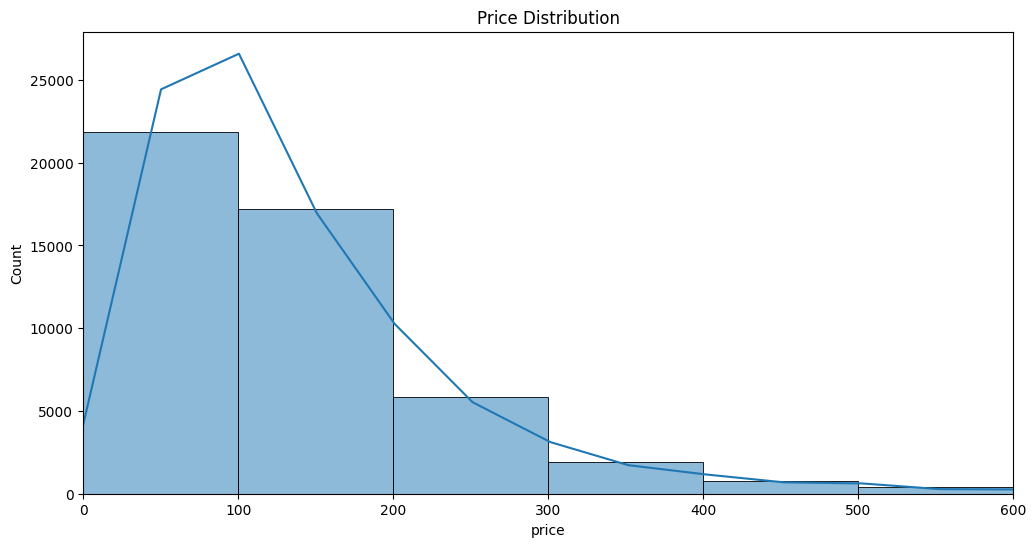

In [11]:
# 2. Price Distribution Analysis
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=100, kde=True)
plt.title('Price Distribution')
plt.xlim(0, 600)
plt.show()


The price distribution is right-skewed, confirming the previously obtained results. Most listings are priced on the lower end, with a mode of 100 US dollars, meaning this is the most frequently occurring price. However due to the presence of high-end listings reaching up to $600, the mean is significantly higher than both the mode and the median. This large spread of prices skews the distribution, pulling the average upward and illustrating the impact of outliers on the overall pricing trends

In this case, we should rely more on the median ($106) rather than the mean, as the median is not influenced by outliers and provides a more accurate representation of typical prices in the distribution.

Kurtosis of Price Distribution: 585.61


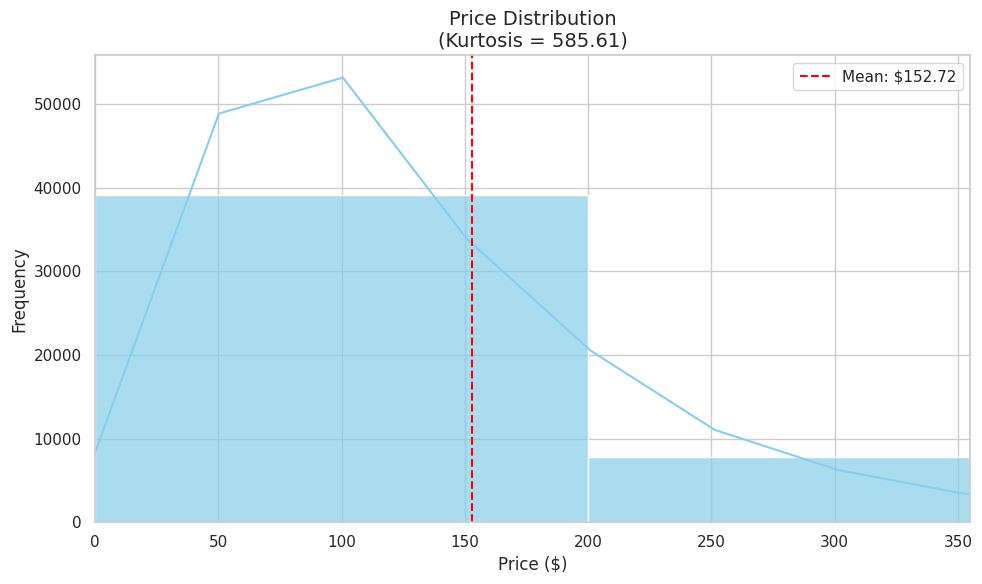

In [12]:
from scipy.stats import kurtosis

# Calculate kurtosis
price_kurtosis = kurtosis(df['price'].dropna(), fisher=True)  # Fisher's definition (normal = 0)
print(f"Kurtosis of Price Distribution: {price_kurtosis:.2f}")

# Set style for better visualization
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create histogram with KDE to show the distribution shape
ax = sns.histplot(df['price'], bins=50, kde=True, color='skyblue', alpha=0.7)
plt.title(f'Price Distribution\n(Kurtosis = {price_kurtosis:.2f})', fontsize=14)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add vertical line at mean
mean_price = df['price'].mean()
plt.axvline(mean_price, color='red', linestyle='--', linewidth=1.5,
            label=f'Mean: ${mean_price:.2f}')

# Limit x-axis to 95th percentile to see main distribution better
xlim = df['price'].quantile(0.95)
plt.xlim(0, xlim)

# Add legend and adjust layout
plt.legend()
plt.tight_layout()
plt.show()



The extremely high kurtosis (580) indicates that Airbnb prices are highly concentrated around lower values, with a few very expensive listings creating extreme outliers and heavy tails. This suggests that the mean is skewed by luxury properties, such as castles for rent, whose prices can be drastically higher than those of typical homes, leading to an inaccurate representation of average prices.

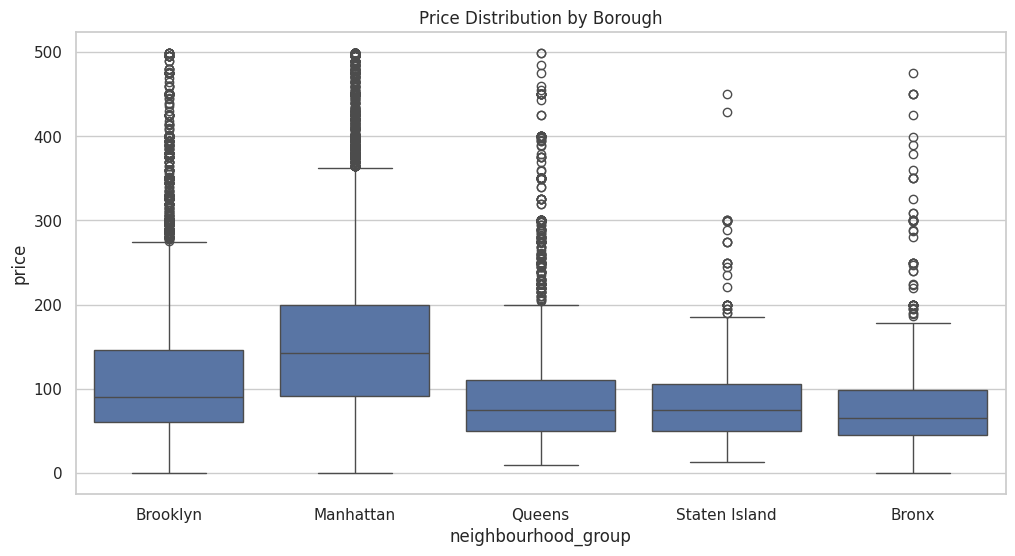

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df[df['price'] < 500])
plt.title('Price Distribution by Borough')
plt.show()



The boxplot representation highlights the presence of a significant number of outliers, further emphasizing the skewed distribution of Airbnb prices due to the extreme values of a few luxury listings

<ipython-input-14-3f2aee405a5e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index,


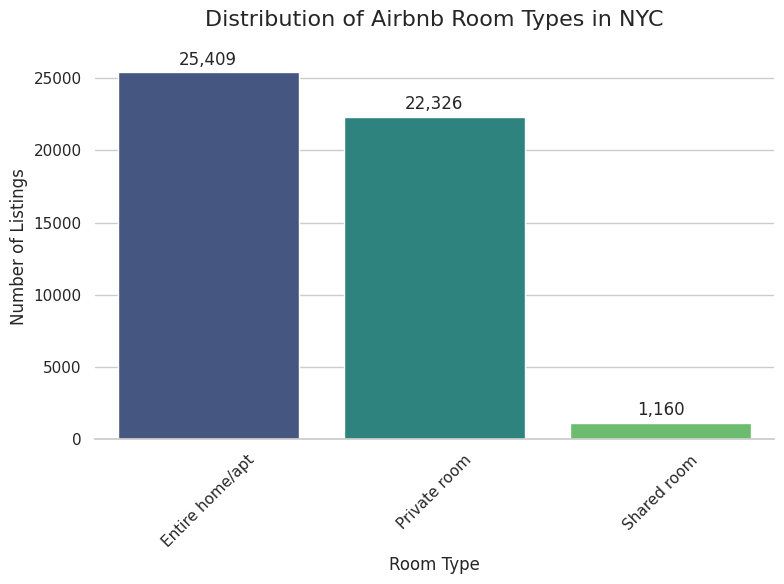

In [14]:
# Set style for better visuals
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create countplot of room types
ax = sns.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index,
                   palette='viridis')

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Customize the plot
plt.title('Distribution of Airbnb Room Types in NYC', fontsize=16, pad=20)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xticks(rotation=45)
sns.despine(left=True)

# Show the plot
plt.tight_layout()
plt.show()

Most Airbnb listings in New York City are entire homes or apartments. This shows that hosts prefer renting out full places instead of shared rooms. Visitors to NYC seem to want their own space more than shared housing, probably because it's more private and convenient in a busy city like new york city ."

<Figure size 1200x600 with 0 Axes>

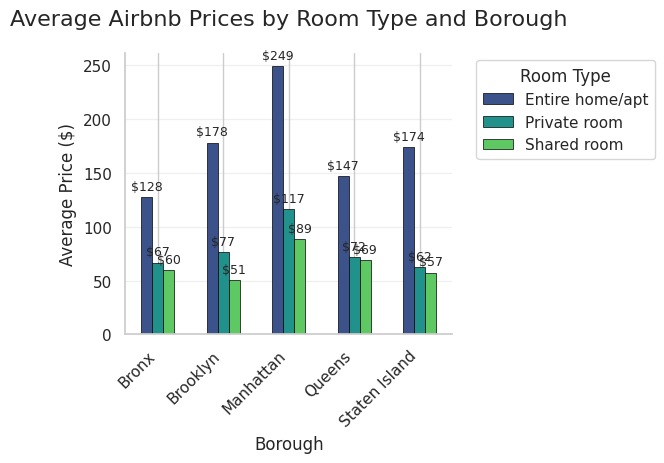

In [18]:
# Create visualization
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Calculate average prices by room type and borough
room_type_prices = df_clean.groupby(['neighbourhood_group', 'room_type'])['price'].mean().unstack()


# Create clustered bar chart
room_type_prices.plot(kind='bar',
                     color=sns.color_palette("viridis", len(room_type_prices.columns)),
                     edgecolor='black',
                     linewidth=0.5)

# Customize plot
plt.title('Average Airbnb Prices by Room Type and Borough', fontsize=16, pad=20)
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for container in plt.gca().containers:
    plt.bar_label(container,
                 fmt='$%.0f',
                 label_type='edge',
                 padding=3,
                 fontsize=9)

# Move legend outside
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')

sns.despine()
plt.tight_layout()
plt.show()



Manhattan indeed has the highest prices across all types of listings, but an interesting trend emerges when looking at Queens. Although Queens ranks third in overall prices for entire homes and private rooms, it has the second-highest average price for shared rooms 69 $. This can be explained by the fact that Queens, being close to Manhattan, attracts renters who are looking for more affordable options than the city’s core while still maintaining accessibility to central areas.

In [19]:
df[df['availability_365'] == 0]['id'].count()


np.int64(17533)

There are 17,533 listings with 0 days of availability, likely due to inactive listings or temporarily blocked properties while hosts adjust pricing or update their listings. Therefore, these listings will be excluded from further analysis.

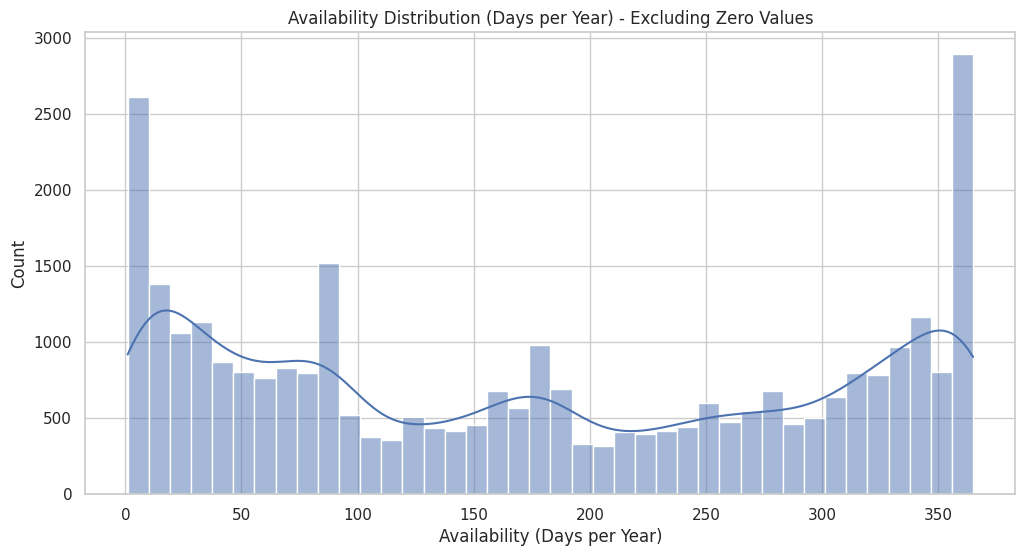

In [20]:
# 6. Availability Analysis (Excluding Zero Values)
plt.figure(figsize=(12, 6))
sns.histplot(df[df['availability_365'] >0]['availability_365'], bins=40, kde=True)
plt.title('Availability Distribution (Days per Year) - Excluding Zero Values')
plt.xlabel('Availability (Days per Year)')
plt.ylabel('Count')
plt.show()


The majority of listings are available year-round, but a significant number are only open for short-term periods. This variation can be explained by different hosting strategies, regulatory restrictions, and seasonal demand. Full-time hosts or professional property managers tend to keep their listings available throughout the year, while part-time hosts may only rent their properties during vacations, holidays, or peak tourist seasons.

Reviews Grouped by Month (All Years Combined):
   review_month  review_count
4       January          2773
3      February           770
7         March          1288
0         April          2109
8           May          4701
6          June         13589
5          July          5937
1        August          1667
11    September          1535
10      October          1546
9      November          1158
2      December          1770


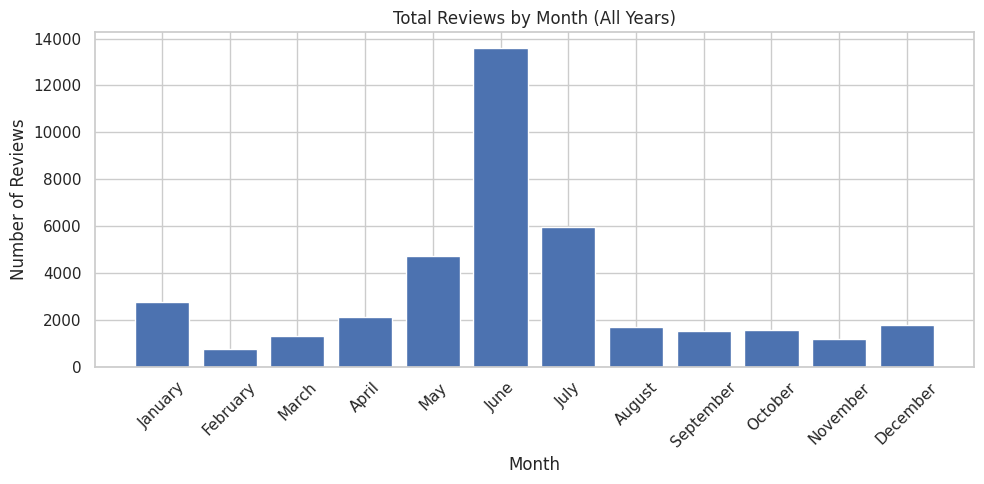

In [24]:

# Convert last_review to datetime and extract month name
df['last_review'] = pd.to_datetime(df['last_review'])
df['review_month'] = df['last_review'].dt.month_name()

# Group by month name and count reviews
monthly_reviews = df.groupby('review_month').size().reset_index(name='review_count')

# Order months chronologically (not alphabetically)
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_reviews['review_month'] = pd.Categorical(monthly_reviews['review_month'],
                                               categories=month_order,
                                               ordered=True)
monthly_reviews = monthly_reviews.sort_values('review_month')

# Print results
print("Reviews Grouped by Month (All Years Combined):")
print(monthly_reviews)

# Plot the results
plt.figure(figsize=(10, 5))
plt.bar(monthly_reviews['review_month'], monthly_reviews['review_count'])
plt.title('Total Reviews by Month (All Years)')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The analysis of Airbnb reviews in New York City reveals distinct seasonal patterns in visitor activity. Reviews peak dramatically during the summer months, with June recording the highest volume at 13,589 reviews, followed closely by July and May. This surge aligns with NYC's peak tourist season, when favorable weather enables outdoor exploration and major events attract visitors. However, the data shows a secondary spike in January (2,7730 reviews), underscoring NYC's enduring appeal as a winter holiday destination, thanks to New Year's Eve celebrations. The winter months maintain steady activity despite colder temperatures, while February represents the annual low point with just 770 reviews. These patterns suggest that while summer remains NYC's busiest tourism period, the city successfully draws visitors year-round through its diverse array of seasonal attractions and cultural offerings. The consistent volume of reviews outside peak season indicates that NYC maintains its status as a perennial destination rather than just a summer hotspot.

# Recommendations


**For** **travelers**:

- Luxury and Convenience Seekers focus on Manhattan Focus

Why?

Prime locations (Times Square, SoHo )  with walkable access to attractions.

Higher-end amenities (doorman buildings, rooftop terraces, concierge services).

Best for: Business travelers, luxury seekers, first-time tourists.

-  Budget-Conscious Travelers (Queens, Bronx, Brooklyn)

Queens: 20-30% cheaper than Manhattan, great subway links.

Brooklyn : Trendy neighborhoods with lower nightly rates.

The Bronx: Most affordable

⚠ Considerations:

Prices peak in summer (June–August) and January (holiday season)—book early.

**For** **Hosts**:

- Revenue Optimization:

Peak Seasons (Summer, Holidays): Increase rates by 20-30%.

Shoulder Seasons (Spring/Fall): Offer 3-night minimums to reduce turnover.

Winter: Target business travelers with weekly discounts.

- Shared Room Hosts:

Prioritize shared room offerings to address a clear market opportunity, as this category represents the smallest segment of NYC's Airbnb inventory while maintaining consistent demand.

Lower overhead costs but steady demand from solo travelers.











